<a href="https://colab.research.google.com/github/NophaieViscente/PredictSalary/blob/main/PredictSalary_RegressionProblemExample_AED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Predição de Salário - Problema de Regressão
* Este projeto tem por objetivo, efetuar uma predição dos salários para determinados empregos, com base em um conjunto de dados pré-definido.
* O projeto será totalmente executado dentro deste Notebook.

# Carregando as bibliotecas necessárias.

* A seguir será efetuado o carregamento das bibliotecas necessárias para uso no projeto.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Carregando os dados.

* A seguir é efetuado o carregamento dos dados para uso no projeto.

In [3]:
train = pd.read_csv(f'/content/drive/MyDrive/Train_rev1.csv')
#test = pd.read_csv(f'/content/drive/MyDrive/Test_rev1.csv')
#valid = pd.read_csv(f'/content/drive/MyDrive/Valid_rev1.csv')
#location = pd.read_csv(f'/content/drive/MyDrive/Location_Tree.csv',header=None)

# AED (Análise Exploratória de Dados)
* Esta parte do projeto destina-se a análise exploratória de dados, parte importante de um projeto de DataScience. Através dessa primeira análise poderemos ter noções sobre o conjunto de dados que estamos trabalhando e também aplicar limpeza e transformação de dados.
 

### Validando as informações dos dataSets.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


* Observa-se que existem 244768 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.
* Um item faltante em Title.

### Encontrando o item faltante no Cargo.
* Encontrar o indice do item faltante para validar se pode ser adicionado manualmente o cargo.

In [5]:
for indice,conteudo in train.Title.items():
    if type(conteudo) != str :
      print(indice)

1588


In [6]:
train.loc[1588]

Id                                                             48271669
Title                                                               NaN
FullDescription       Quality Improvement Manager North West England...
LocationRaw                                       Liverpool, Merseyside
LocationNormalized                                            Liverpool
ContractType                                                  full_time
ContractTime                                                        NaN
Company                                                             NaN
Category                                      Healthcare & Nursing Jobs
SalaryRaw                                     40,000 to 45,000 per year
SalaryNormalized                                                  42500
SourceName                                               careworx.co.uk
Name: 1588, dtype: object

* Verificado o item de indice 1588, onde o cargo é o 'Quality Improvement Manager'

* Adicionar dados ao indice 1588 

In [7]:
train.loc[[1588],'Title'] = 'Quality Improvement Manager'

* Validar dados adicionados.

In [8]:
train.info(), train.loc[1588]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244768 non-null  int64 
 1   Title               244768 non-null  object
 2   FullDescription     244768 non-null  object
 3   LocationRaw         244768 non-null  object
 4   LocationNormalized  244768 non-null  object
 5   ContractType        65442 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244768 non-null  object
 9   SalaryRaw           244768 non-null  object
 10  SalaryNormalized    244768 non-null  int64 
 11  SourceName          244767 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


(None, Id                                                             48271669
 Title                                       Quality Improvement Manager
 FullDescription       Quality Improvement Manager North West England...
 LocationRaw                                       Liverpool, Merseyside
 LocationNormalized                                            Liverpool
 ContractType                                                  full_time
 ContractTime                                                        NaN
 Company                                                             NaN
 Category                                      Healthcare & Nursing Jobs
 SalaryRaw                                     40,000 to 45,000 per year
 SalaryNormalized                                                  42500
 SourceName                                               careworx.co.uk
 Name: 1588, dtype: object)

* Verifica-se que fora adicionado o dado.

In [9]:
#test.info()

* Observa-se que existem 122463 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

In [10]:
#valid.info()

* Observa-se que existem 40663 linhas nesse dataSet.
* Pode-se observar que temos vários dados faltantes em algumas colunas, são elas : ContractType, ContractTime e Company.

### Verificando duplicidade de dados nos DataSets.

In [11]:
#train.Id.unique().size, test.Id.unique().size, valid.Id.unique().size

* Pode-se verificar que o Id é único em todos os datasets.

### Verificando os dados.
* Usando um histograma para validar a distribuição dos dados do Salário Normalizado

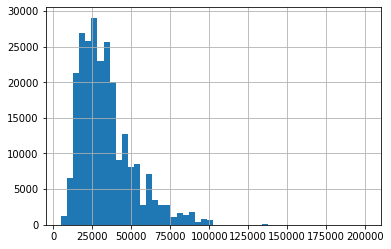

In [12]:
train.SalaryNormalized.hist(bins=50)

# Pré-Processamento de dados.
* Nessa fase iremos preparar os dados para a modelagem, com auxílio de algumas análises.

### Utilizando uma cópia do DataSet.
* Utilizando essa técnica para se caso ocorra um erro apenas recarreguemos o dataset inicial de treino, retornando desse ponto.

In [13]:
df_tmp = train.copy()

### Transformando os dados.
* Transformando os dados de cargos todos em caracteres minúsculos.

In [14]:
df_tmp.Title = df_tmp.Title.str.lower()

In [15]:
df_tmp.groupby('LocationRaw').count().sort_values(by='SalaryNormalized',ascending=True)

,Id,Title,FullDescription,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
LocationRaw,,,,,,,,,,,
"London, Middlesex, Hertfordshire, Buckinghamshire, Surrey, , Greater London",1,1,1,1,0,0,1,1,1,1,1
Nass,1,1,1,1,1,0,1,1,1,1,1
"National - Midlands, Home Counties, Thames Valley, South",1,1,1,1,0,1,1,1,1,1,1
National Role - Preferably Midlands/North West,1,1,1,1,1,1,1,1,1,1,1
National Role but Ideally based in the North of England,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
City of London - London,2344,2344,2344,2344,2344,2309,2344,2344,2344,2344,2344
City London South East,2843,2843,2843,2843,15,2667,2843,2843,2843,2843,2843
UK,5538,5538,5538,5538,2758,4685,5086,5538,5538,5538,5538


### Conferindo se a coluna 'SalaryRaw' tem algum valor nulo

In [16]:
df_tmp.SalaryRaw.isna().sum()

0

### Criação de novas características

* Criação de lista para alocar os valores únicos de salários

In [17]:
salary_list = df_tmp['SalaryRaw'].unique().tolist()

* Conferindo a quantidade de registros da lista

In [18]:
len(salary_list)

97286

* Criação de função para alocar em nova coluna a periodicidade de recebimento salarial

In [19]:
def base_salarial(x):
    y=""
    if "year" in str(x):
        y = "Yearly"
    elif "annum" in str(x):
        y = "Yearly"
    elif "hour" in str(x):
        y = "Hourly"
    elif "day" in str(x):
        y = "Daily"
    elif "week" in str(x):
        y = "Weekly"
    
    return y

In [20]:
df_tmp['Rate_by'] = df_tmp['SalaryRaw'].apply(base_salarial)

* Filtrando os dados que não tinham descrição deduzindo que são com periodicidade anual

In [21]:
filtro = df_tmp['Rate_by'] == ""

In [22]:
df_tmp.loc[filtro,'Rate_by'] = 'Yearly'

* Conferindo a quantidade de dados e frequência e periodicidade do cálculo de valor dos salários

In [23]:
df_tmp.groupby('Rate_by').SalaryRaw.count()

Rate_by
Daily       9195
Hourly     27879
Weekly      1498
Yearly    206196
Name: SalaryRaw, dtype: int64

* Criação de intervalos salariais/categorias

In [24]:
intervalosSalariais = [0,25000,50000,70000,90000,120000,300000]

In [25]:
df_tmp['SalaryBin'] = pd.cut(x=df_tmp.SalaryNormalized, bins=intervalosSalariais, labels=False)

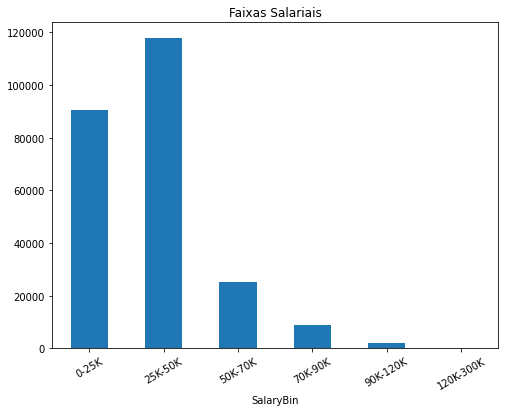

In [26]:
plt.figure(figsize=(8,6))
df_tmp.groupby('SalaryBin')['LocationNormalized'].count().plot.bar()
plt.title("Faixas Salariais")
plt.xticks([0,1,2,3,4,5],['0-25K','25K-50K','50K-70K','70K-90K','90K-120K','120K-300K'], rotation=30)
plt.show()

### Usando Vetorização de palavras para verificar a coluna Title - Cargo

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

y = df_tmp['SalaryBin'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(df_tmp['Title'], y, test_size=0.2)

cv = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=0.03)

* Ajustando o count vectorizer para a coluna Title - Cargo

In [28]:
cv.fit(df_tmp.Title)

palavrasCargos = pd.DataFrame(cv.transform(df_tmp.Title).todense(), columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
palavrasCargos

,analyst,assistant,business,consultant,developer,engineer,executive,london,manager,sales,senior,support
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244763,0,0,0,0,0,0,0,0,0,0,0,0
244764,0,0,1,0,0,0,0,0,0,0,0,0
244765,0,0,0,0,0,0,0,0,0,0,0,0
244766,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
obs_palavras = pd.concat([palavrasCargos, df_tmp.SalaryBin], axis=1)

obs_palavras.head()

,analyst,assistant,business,consultant,developer,engineer,executive,london,manager,sales,senior,support,SalaryBin
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
for i in range(0,6) : 
  contadorPalavras = obs_palavras[obs_palavras['SalaryBin']==i].sum(axis=0)
  print(f'Faixa Salarial de {intervalosSalariais[i]}K até {intervalosSalariais[i+1]}K anual, ocorrências de palavras: ')
  palavrasComuns = contadorPalavras.sort_values(ascending=False)
  print(palavrasComuns)

Faixa Salarial de 0K até 25000K anual, ocorrências de palavras: 
assistant     10158
sales          9615
manager        9226
executive      5482
support        5160
consultant     3665
engineer       3438
business       1969
senior         1885
analyst        1671
london         1610
developer      1449
SalaryBin         0
dtype: int64
Faixa Salarial de 25000K até 50000K anual, ocorrências de palavras: 
SalaryBin     117918
manager        30429
engineer       17307
senior          9893
developer       9206
sales           8367
analyst         5569
london          5429
business        5378
executive       4498
consultant      3840
support         2865
assistant       1878
dtype: int64
Faixa Salarial de 50000K até 70000K anual, ocorrências de palavras: 
SalaryBin     50558
manager        8176
senior         3841
engineer       2442
developer      2115
business       1805
london         1696
consultant     1435
analyst        1371
sales          1313
executive       496
support         34

* Unindo as colunas Title e FullDescription

In [32]:
#df_tmp['Full_Title'] = df_tmp['Title'].str.cat(df_tmp['FullDescription'], sep = ' ')

In [33]:
df_tmp.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,Rate_by,SalaryBin
0,12612628,engineering systems analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,Yearly,0
1,12612830,stress engineer glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,Yearly,1
2,12612844,modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,Yearly,1
3,12613049,engineering systems analyst / mathematical mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk,Yearly,1
4,12613647,"pioneer, miser engineering systems analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,Yearly,0


### Processamento do texto 

* Primeiramente importaremos as bibliotecas usadas

In [34]:
import nltk
nltk.download('stopwords')
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* Criando funções para a limpeza do texto

In [35]:
def limpaTexto(descricoesTrabalho) :
  descricao = []
  padrao = "([a-zA-Z]+(?:'[a-z]+)?)"
  listaStopWords = stopwords.words('english')
  listaStopWords += list(string.punctuation)
  listaStopWords += ['0','1','2','3','4','5','6','8','9']

  for descricaoTrabalho in descricoesTrabalho:
        descricaoTrab_tokens_raw = nltk.regexp_tokenize(descricaoTrabalho, padrao)
        descricaoTrab_tokens=[palavra.lower() for palavra in descricaoTrab_tokens_raw]
        descricaoTrab_words_stopped = [palavra for palavra in descricaoTrab_tokens if palavra not in listaStopWords]
        descricao.append(descricaoTrab_words_stopped)

  return pd.Series(descricao)

* Tokenizando o texto das colunas Title.

In [36]:
trab_tokens = limpaTexto(df_tmp['Title'])

In [37]:
tokens = [palavra for trabalho in trab_tokens for palavra in trabalho]

In [38]:
trab_tokens_freq = FreqDist(tokens)
trab_tokens_freq.most_common(100)

[('manager', 50160),
 ('engineer', 24190),
 ('sales', 19769),
 ('senior', 16976),
 ('developer', 13896),
 ('assistant', 12179),
 ('k', 11060),
 ('executive', 10629),
 ('business', 9988),
 ('consultant', 9497),
 ('london', 9486),
 ('analyst', 9315),
 ('support', 8512),
 ('project', 7229),
 ('nurse', 7103),
 ('development', 6874),
 ('account', 6519),
 ('administrator', 6374),
 ('service', 6296),
 ('c', 6054),
 ('software', 5505),
 ('teacher', 5489),
 ('marketing', 5002),
 ('chef', 5000),
 ('care', 4917),
 ('design', 4791),
 ('recruitment', 4568),
 ('advisor', 4465),
 ('technical', 4246),
 ('worker', 3984),
 ('customer', 3885),
 ('head', 3765),
 ('graduate', 3754),
 ('accountant', 3744),
 ('team', 3704),
 ('officer', 3680),
 ('home', 3595),
 ('technician', 3580),
 ('finance', 3459),
 ('mechanical', 3360),
 ('services', 3320),
 ('web', 3278),
 ('financial', 3251),
 ('rgn', 3169),
 ('systems', 3117),
 ('management', 3106),
 ('coordinator', 3076),
 ('lead', 3056),
 ('commercial', 2952),
 ('h

* Quantidade total de palavras em todos os anúncios

In [39]:
len(trab_tokens_freq)

18160

* **Normalização da Frequência de palavras** : Divide-se a frequência de cada palavra pelo número total de palavras.

In [40]:
totalPalavras = sum(trab_tokens_freq.values())
top100_trab = trab_tokens_freq.most_common(100)

In [41]:
print(f'Palavra               Frequencia Normalizada')
for palavra in top100_trab : 
  freqNormal = palavra[1]/totalPalavras
  print(f'{palavra[0]}   ------------   {freqNormal:.4}')

Palavra               Frequencia Normalizada
manager   ------------   0.05213
engineer   ------------   0.02514
sales   ------------   0.02055
senior   ------------   0.01764
developer   ------------   0.01444
assistant   ------------   0.01266
k   ------------   0.01149
executive   ------------   0.01105
business   ------------   0.01038
consultant   ------------   0.00987
london   ------------   0.009859
analyst   ------------   0.009681
support   ------------   0.008847
project   ------------   0.007513
nurse   ------------   0.007382
development   ------------   0.007144
account   ------------   0.006775
administrator   ------------   0.006625
service   ------------   0.006544
c   ------------   0.006292
software   ------------   0.005722
teacher   ------------   0.005705
marketing   ------------   0.005199
chef   ------------   0.005197
care   ------------   0.00511
design   ------------   0.004979
recruitment   ------------   0.004748
advisor   ------------   0.004641
technical  

* Pode-se observar que com o N-gram com uma única palavra não ficou bom seu aproveitamento, portanto será partido para a criação de um 2-gram ou bi-grama e 3-gram ou tri-grama.

### Criando Tri-gramas para validação no texto da coluna Title

* Importando bibliotecas necessárias

In [42]:
from nltk.collocations import *

In [43]:
trigram_ = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(tokens)
score = finder.score_ngrams(trigram_.raw_freq)

In [44]:
score[0:30]

[(('business', 'development', 'manager'), 0.002540118067681051),
 (('chef', 'de', 'partie'), 0.0016733183670075663),
 (('mechanical', 'design', 'engineer'), 0.0010289348964829135),
 (('motor', 'trade', 'job'), 0.0010091876610958677),
 (('qualified', 'social', 'worker'), 0.0006184002660680136),
 (('business', 'development', 'executive'), 0.000608006984285358),
 (('graduate', 'sales', 'executive'), 0.000564355200798204),
 (('field', 'service', 'engineer'), 0.0005435686372328927),
 (('trainee', 'recruitment', 'consultant'), 0.0005404506526980959),
 (('field', 'sales', 'executive'), 0.0005342146836285025),
 (('manager', 'business', 'development'), 0.0005248607300241124),
 (('area', 'sales', 'manager'), 0.0004967988692109421),
 (('staff', 'nurse', 'rgn'), 0.0004947202128544109),
 (('customer', 'service', 'advisor'), 0.00046977633657603726),
 (('registered', 'general', 'nurse'), 0.000458343726615116),
 (('manager', 'sales', 'executive'), 0.0004406751475846013),
 (('senior', 'quantity', 'surv

### Criando uma núvem de palavras com os Cargos
* Importando as bibliotecas necessárias

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

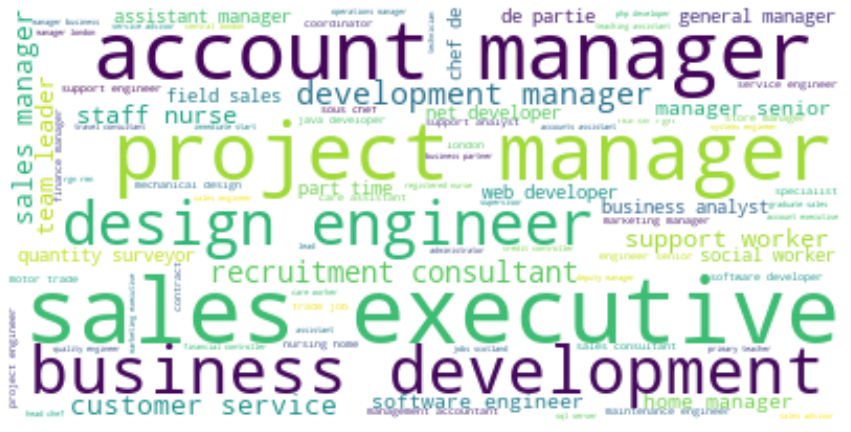

In [46]:
#Alocando o texto da coluna Title em uma variável
text = " ".join(descricao for descricao in df_tmp['Title'])

#Criando uma lista de stopwords.
stopwords = set(STOPWORDS)

# Criando a núvem de palavras
wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()